**Muhammad Aizar Yazid / 1103223097**

# Infrared.csv Tugas Week 1

1. Buat model Deep learning (PyTorch and Tensorflow). Target variable aveOralM.
2. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.


# Data Cleaning and Converting

In [30]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the dataset
file_path = '/content/Infrared.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()


,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,...,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,aveOralM
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,...,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525,36.59
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,...,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075,37.19
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,...,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850,37.34
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,...,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825,37.09
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,...,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175,37.04


In [8]:
# Drop rows with missing values
data = data.dropna()

In [9]:
# Defining the categorical and numerical columns
categorical_columns = ["Gender", "Age", "Ethnicity"]
numerical_columns = list(set(data.columns) - set(categorical_columns) - {"aveOralM"})

In [10]:
# Handling missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])
data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])

<ipython-input-10-1b9b6f8b1b8e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[categorical_columns] = cat_imputer.fit_transform(data[categorical_columns])
<ipython-input-10-1b9b6f8b1b8e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numerical_columns] = num_imputer.fit_transform(data[numerical_columns])


In [11]:
# One-Hot Encoding for categorical data
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = encoder.fit_transform(data[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_columns))


In [12]:
# Normalizing the numerical features
scaler_X = StandardScaler()
numerical_data = scaler_X.fit_transform(data[numerical_columns])
numerical_df = pd.DataFrame(numerical_data, columns=numerical_columns)


In [13]:
# Normalizing the target variable
scaler_y = StandardScaler()
target = scaler_y.fit_transform(data[["aveOralM"]]).flatten()

In [14]:
# Combining numerical and categorical features
features = pd.concat([numerical_df, categorical_df], axis=1)


In [15]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Model Deeplearning Menggunakan PyTorch

In [16]:
# Converting to PyTorch tensors
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_torch = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [17]:
# Build a simple neural network model
class DeepLearningModel(nn.Module):
    def __init__(self, input_dim):
        super(DeepLearningModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DeepLearningModel(input_dim=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# Training the model
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_train_torch)
    loss = criterion(y_pred, y_train_torch)
    train_losses.append(loss.item())
    # Backward pass
    loss.backward()
    optimizer.step()

    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [50/100], Loss: 0.2352
Epoch [100/100], Loss: 0.1837


In [19]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_torch)

In [20]:
# Calculate RMSE, MSE, and R^2
y_pred_test_np = y_pred_test.numpy()
y_test_np = y_test_torch.numpy()

mse = mean_squared_error(y_test_np, y_pred_test_np)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_np, y_pred_test_np)

In [21]:
# Display results
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

RMSE: 0.4835
MSE: 0.2338
R^2: 0.6949


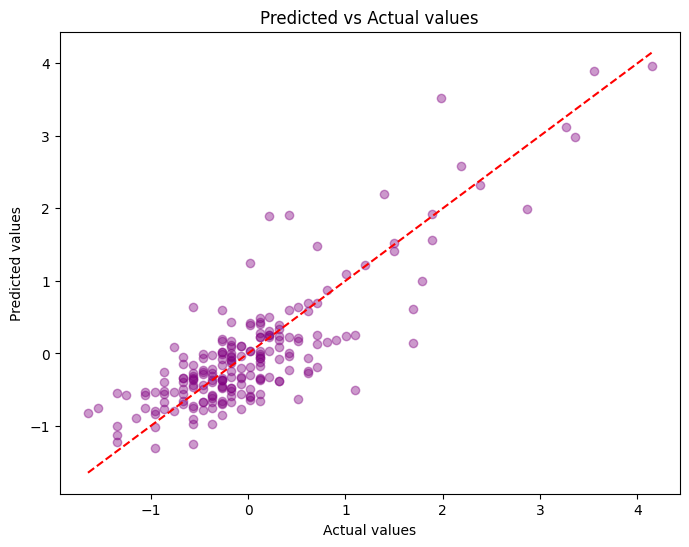

In [41]:
# Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_np, y_pred_test_np, color='purple', alpha=0.4)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.show()


# Deepleaning menggunakan TensorFlow

In [43]:
# Bangun model neural network menggunakan TensorFlow (Keras)
model = keras.Sequential([
    layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer
])

# Kompilasi model dengan loss function dan optimizer
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
# Training model
epochs = 100
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0)

In [45]:
# Evaluasi model pada data uji
y_pred_test = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [46]:
# Calculate MSE, RMSE, dan R²
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

In [47]:
# Display results
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

RMSE: 0.6331
MSE: 0.4009
R^2: 0.4769


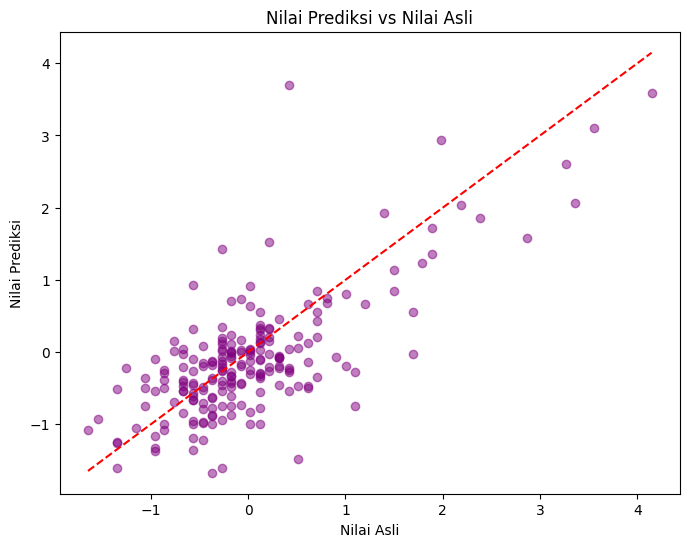

In [48]:
# Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_torch.numpy(), y_pred_test, color='purple', alpha=0.5)
plt.plot([y_test_torch.numpy().min(), y_test_torch.numpy().max()], [y_test_torch.numpy().min(), y_test_torch.numpy().max()], color='red', linestyle='--')
plt.xlabel('Nilai Asli')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Prediksi vs Nilai Asli')
plt.show()

# Penjelasan persamaan matematika



**1. Forward Pass - Model Neural Network:**
  
  Pada forward pass, input dari data (fitur) melewati beberapa lapisan jaringan saraf (neural network layers) untuk menghasilkan prediksi.

  Misalnya, jika kita memiliki jaringan saraf dengan 3 lapisan seperti yang telah dijelaskan, maka proses di dalam setiap lapisan dapat ditulis sebagai:


 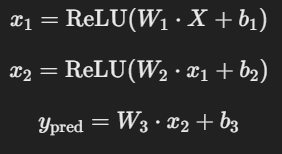
  
  
  W: Matriks bobot yang menghubungkan setiap neuron dalam lapisan ke lapisan berikutnya.
  
  X: Input data.

  b: Bias, yang ditambahkan untuk memperkenalkan fleksibilitas dalam model.
  
  ReLU: Fungsi aktivasi ReLU (Rectified Linear Unit), yang memberikan output 0 untuk nilai negatif dan nilai inputnya untuk nilai positif. Fungsi ini ditulis sebagai:



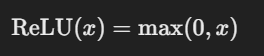


ReLU digunakan untuk memperkenalkan non-linearitas ke dalam model, membantu model untuk menangani hubungan yang lebih kompleks dalam data.

2. Loss Function - Mean Squared Error (MSE):

Fungsi loss digunakan untuk mengukur seberapa baik model kita dalam memprediksi nilai target berdasarkan data input. Dalam masalah regresi, kita menggunakan Mean Squared Error (MSE) yang dihitung sebagai:

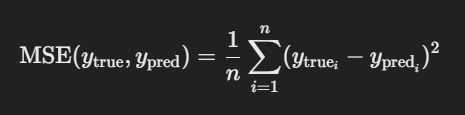

ytrue: Nilai target yang sebenarnya.

ypred: Nilai prediksi yang dihasilkan oleh model.

n: Jumlah total sampel data.

3. Backpropagation - Gradient Descent:

Selama pelatihan, kita menggunakan backpropagation untuk memperbarui parameter model (yaitu bobot dan bias) dengan cara mengoptimalkan fungsi loss menggunakan Gradient Descent atau metode optimisasi lainnya. Proses ini melibatkan penghitungan turunan (gradien) dari fungsi loss terhadap parameter model.

Gradien dihitung menggunakan aturan rantai, dan bobot diperbarui dengan cara:

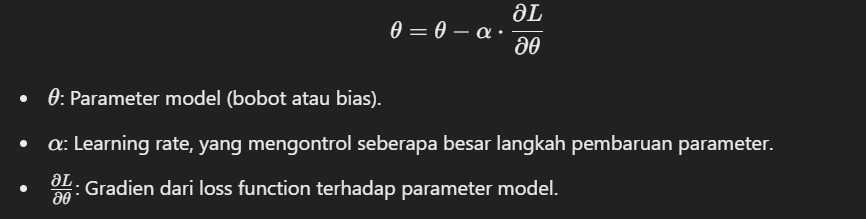



4. Optimizers - Adam:

Pada implementasi Anda, optimizer yang digunakan adalah Adam (Adaptive Moment Estimation). Optimizer ini merupakan peningkatan dari Stochastic Gradient Descent (SGD) dengan memperkenalkan dua momen (momentum) dalam pembaruan parameter: momen pertama (gradien) dan momen kedua (kecepatan perubahan gradien). Rumus pembaruan parameter menggunakan Adam adalah:

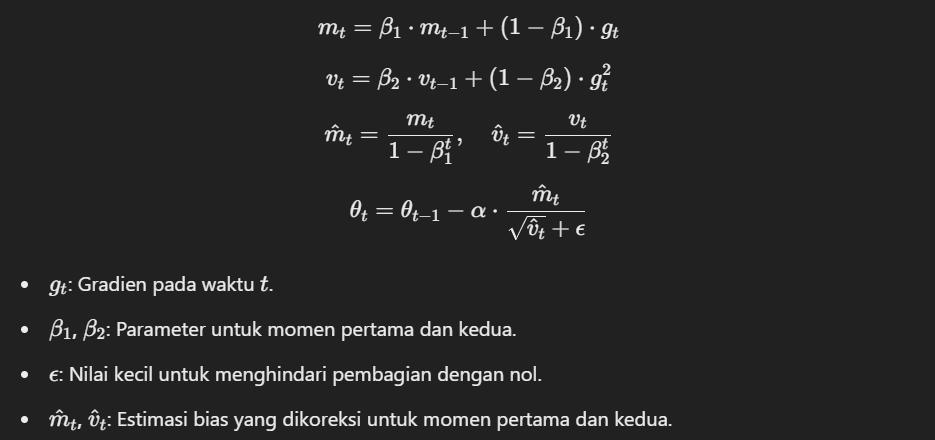



5. Evaluation Metrics - RMSE, MSE, R²:

Setelah model dilatih, kita mengevaluasi kinerja model menggunakan beberapa metrik evaluasi.

5.1. Mean Squared Error (MSE):
    
    MSE adalah ukuran kesalahan rata-rata antara nilai aktual dan nilai prediksi:

    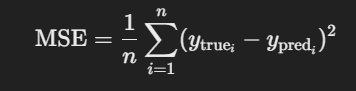

    5.2. Root Mean Squared Error (RMSE):

    RMSE adalah akar kuadrat dari MSE, memberikan ukuran kesalahan dalam unit yang sama dengan data asli:

    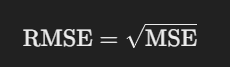

5.3 R² (Koefisien Determinasi):
    
  mengukur sejauh mana variabel input dapat menjelaskan variabilitas variabel output. Rumusnya adalah:


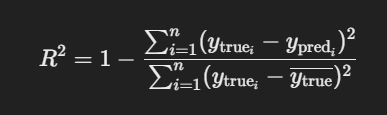

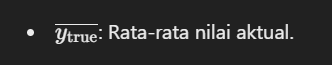


R² berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan model yang lebih baik dalam menjelaskan variabilitas data.